<a href="https://colab.research.google.com/github/Hari-Soorya/G_C/blob/main/Treatment_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a data set dedicated to cost of treatment of different patients. The cost of treatment can depend on disease,region, age....

---



In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

**Seperating Numerical Data's**

In [ ]:
num=[i for i in df.columns if ((df[i].dtype != 'object'))]
num

['age', 'bmi', 'children', 'charges']

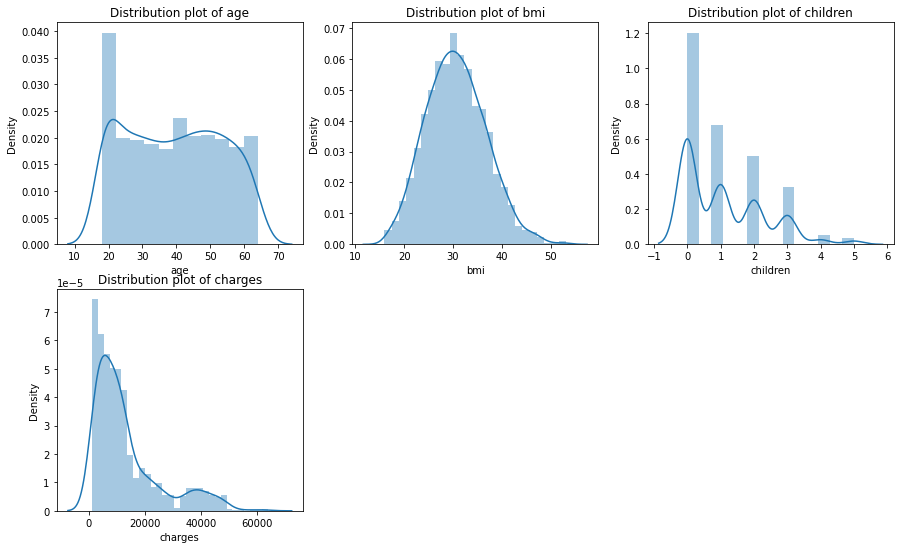

In [ ]:
plt.figure(figsize=(15,58))
plotnumber=1
for i in num:
  plt.subplot(12,3,plotnumber)
  sns.distplot(df[i])
  plt.title('Distribution plot of {}'.format(i))
  plotnumber+=1
plt.show()

From this we can say that,
>* Age is highly distributed
>*   BMI is normally distributed
>* Charges show skew distribution



---



*Label encoding* - to convert object datatype

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
obj=['sex','smoker','region']
for i in obj:
  df[i]=encoder.fit_transform(df[i])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

Female is converterd to 0 and Male is converted to 1

Non-Smoker is converted to 0 and Smoker is converted to 1



---



Since our target is charges, we need to find its correlation with other variables in the dataset

In [ ]:
df.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

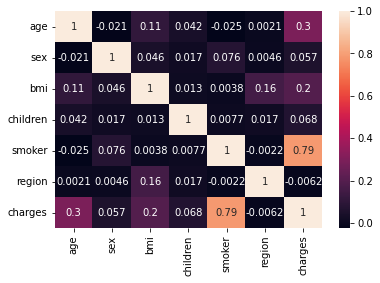

In [ ]:
sns.heatmap(df.corr(),annot=True)

*   From both the correlation data, it is observed that there exist a strong correlation between Smoker and Charges
*   The Region seem to have least relation with Charges



**Visualizations**

[Text(0.5, 1.0, 'Distribution of charges of Smokers')]

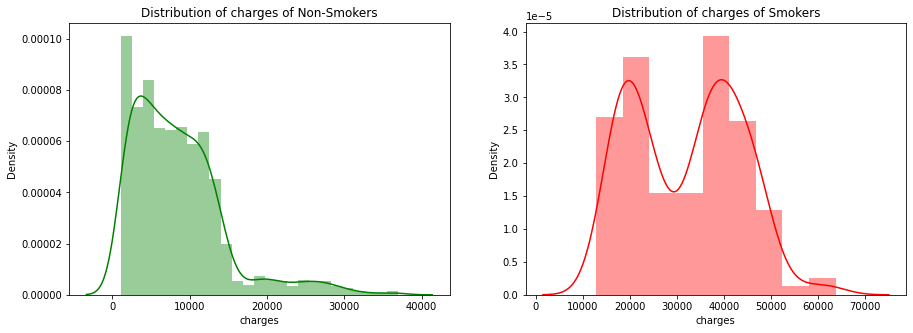

In [ ]:
plt.figure(figsize=(15,5))
ax=plt.subplot(121)
sns.distplot(df[(df.smoker==0)]['charges'],color='g',ax=ax).set(title='Distribution of charges of Non-Smokers')
ax=plt.subplot(122)
sns.distplot(df[(df.smoker==1)]['charges'],color='r',ax=ax).set(title='Distribution of charges of Smokers')

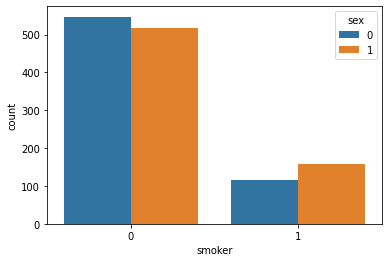

In [ ]:
sns.countplot('smoker',data=df,hue='sex')

There seem to have more non-smokers in the dataset

Among smokers, the number of Male is more

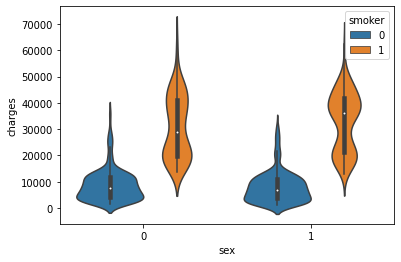

In [ ]:
sns.violinplot('sex','charges',data=df,hue='smoker')

Text(0.5, 1.0, 'Box plot for charges of Men')

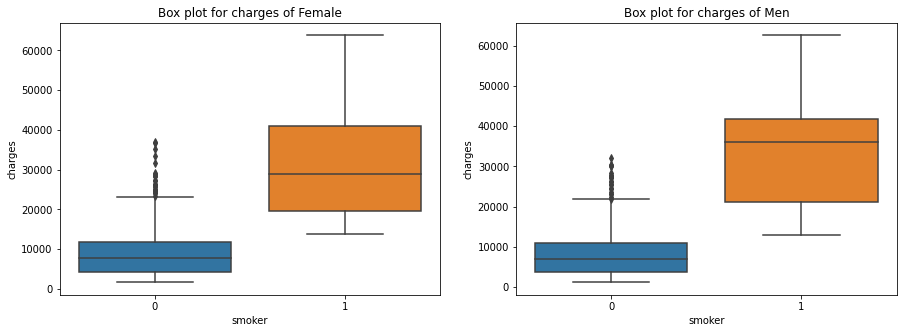

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot('smoker','charges',data=df[df.sex==0])
plt.title('Box plot for charges of Female')
plt.subplot(122)
sns.boxplot('smoker','charges',data=df[(df.sex==1)])
plt.title('Box plot for charges of Men')

From the above box plots, we can say that the avg. charge of a Male smoker is more than the avg. charge of Female smoker 

[Text(0.5, 1.0, 'Distribution of Age')]

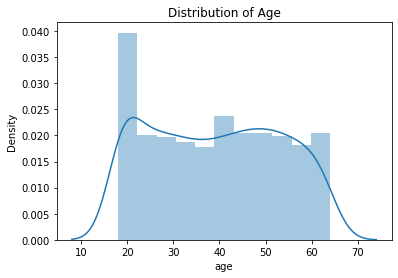

In [ ]:
sns.distplot(df['age']).set(title='Distribution of Age')

In [ ]:
df['age'].min()

18

From this distribution of smokers, we can see a large spike from 18-25(nearly)

Text(0.5, 1.0, 'Number of smokers and non-Smokers in the age between 18 and 25 ')

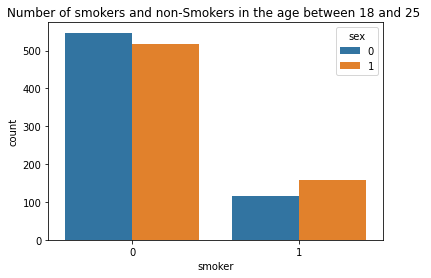

In [ ]:
sns.countplot(df['smoker'],hue=df['sex'],data=df[(df['age']>=18) & (df['age']<25)])
plt.title('Number of smokers and non-Smokers in the age between 18 and 25 ')

From this we can say that, more Men patients in the age group 18-25 have the habit of Smoking 

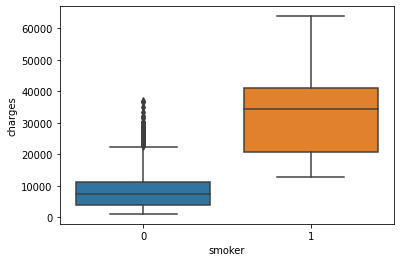

In [ ]:
sns.boxplot(df.smoker,df.charges,data=df[(df['age']>=18) & (df['age']<25)])

From this we can say that most of the smokers in the age group 18-25 seem to spend large amount on treatment compared to non-smokers

[Text(0.5, 1.0, 'Distribution of BMI')]

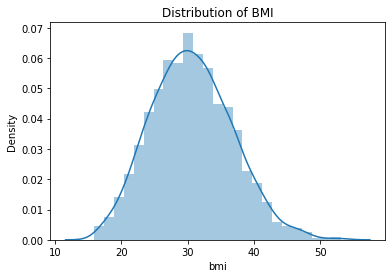

In [ ]:
sns.distplot(df['bmi']).set(title='Distribution of BMI')

Here, we can see that the distrubution is maximum in 30 range

[Text(0.5, 1.0, 'Distribution of charges of patients with BMI greater than 30')]

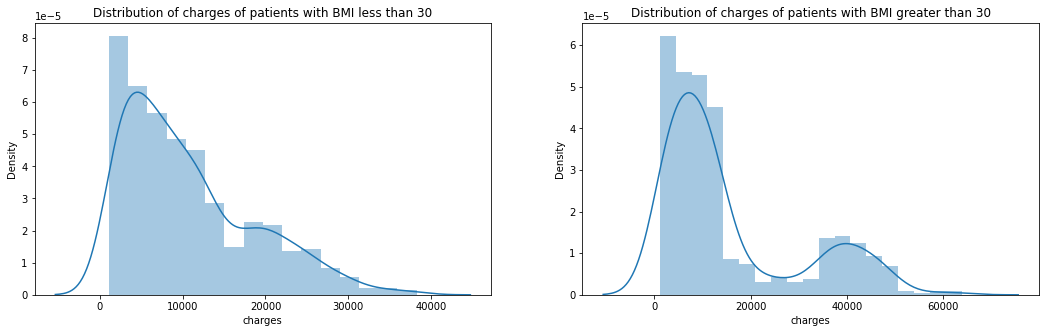

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.distplot(df[(df['bmi']<30)]['charges']).set(title='Distribution of charges of patients with BMI less than 30')
plt.subplot(122)
sns.distplot(df[(df['bmi']>=30)]['charges']).set(title='Distribution of charges of patients with BMI greater than 30')

From this it is clear that patients with BMI greater than 30 spend more on treatment

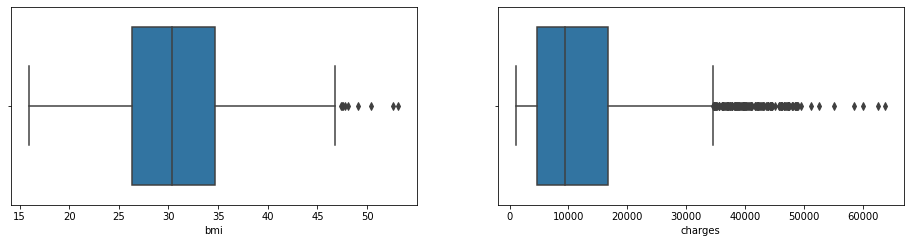

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['bmi'])

plt.subplot(2,2,2)
sns.boxplot(df['charges'])

plt.show()

Here, in the box plot we can see outliers.

Using Interquartile range (IQR) method to remove the outliers

In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
Q1=df.charges.quantile(0.25)
Q3=df.charges.quantile(0.75)
Q1,Q3

(4740.28715, 16639.912515)

In [ ]:
IQR=Q3-Q1
IQR

11899.625365

In [ ]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower,upper

(-13109.1508975, 34489.350562499996)

We can either use Trimming or Capping method to remove outliers in IQR

Trimming will cause removal the outlier data

Capping will convert the outlier data to be within the limit of Q1 and Q3

*TRIMMING*

In [ ]:
new_df=df[(df['charges']<upper) & (df['charges']>lower)]

In [ ]:
new_df.shape

(1199, 7)

In [ ]:
df.shape

(1338, 7)

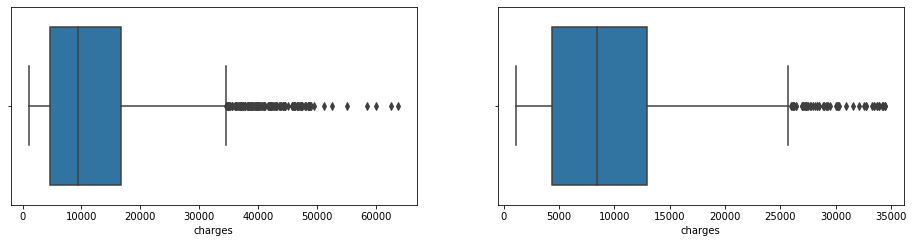

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['charges'])

plt.subplot(2,2,2)
sns.boxplot(new_df['charges'])

plt.show()

In [ ]:
new_df['charges'].describe()

count     1199.000000
mean      9927.753402
std       7241.158309
min       1121.873900
25%       4408.695900
50%       8410.046850
75%      12953.594600
max      34472.841000
Name: charges, dtype: float64

*Capping*

In [ ]:
new_df_cap=df.copy()

new_df_cap['charges']=np.where(new_df_cap['charges']>upper,upper,
                               np.where((new_df_cap['charges']<lower),lower,new_df_cap['charges']))

In [ ]:
new_df_cap.shape

(1338, 7)

In [ ]:
df.shape

(1338, 7)

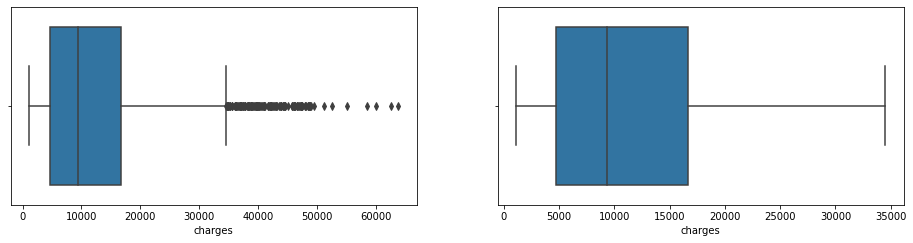

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['charges'])

plt.subplot(2,2,2)
sns.boxplot(new_df_cap['charges'])

plt.show()



---



In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x,y

(array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
        [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
        [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
        ...,
        [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
        [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
        [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]]),
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Hyperfine Tuning is done to get the best parameters

In [ ]:
from sklearn.model_selection import cross_val_score
score=[]
for i in range (1,10):
  pf=PolynomialFeatures(degree=i)
  x_poly=pf.fit_transform(x)
  lr=LinearRegression()
  score.append(cross_val_score(lr,x_poly,y,cv=5).mean())
score

[0.7472559473580954,
 0.7686655556473753,
 0.5400527389736717,
 0.6340080497201529,
 0.44247777832206364,
 -4629.898278786781,
 -143452.79783872855,
 -331053.28368517547,
 -2552462.04839547]

From the cross valuation score, it is evident that the degree =2 will give better result 

In [ ]:
scores=[]
clf=GridSearchCV(RandomForestRegressor(),{'n_estimators':np.arange(50)},cv=5,return_train_score=False)
clf.fit(x,y)
scores.append({
    'model': 'Random Forest',
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
  })
scores

[{'model': 'Random Forest',
  'best_score': 0.8343584959838616,
  'best_params': {'n_estimators': 40}}]

In [ ]:
mm=MinMaxScaler()
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

*Polynomial Regression*

In [ ]:
pf=PolynomialFeatures(degree=2)
x_train_poly=pf.fit_transform(x_train)
x_test_poly=pf.transform(x_test)

In [ ]:
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
y_test_pre=lr.predict(x_test_poly)

In [ ]:
print('R2_Score',r2_score(y_test,y_test_pre))
print('MAE ',mean_absolute_error(y_test,y_test_pre))
print('MSE ',mean_squared_error(y_test,y_test_pre))
print('RMSE ',np.sqrt(mean_squared_error(y_test,y_test_pre)))

R2_Score 0.8813175103251998
MAE  2913.241337472301
MSE  18885940.110247016
RMSE  4345.795682064105


*Random Forest Regression*

In [ ]:
reg=RandomForestRegressor(n_estimators=40)
reg.fit(x_train,y_train)
y_pre=reg.predict(x_test)

In [ ]:
print('R2_Score',r2_score(y_test,y_pre))
print('MAE ',mean_absolute_error(y_test,y_pre))
print('MSE ',mean_squared_error(y_test,y_pre))
print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pre)))

R2_Score 0.8720912197376565
MAE  2665.911795989039
MSE  20354119.38381576
RMSE  4511.553987687143


In [ ]:
data=[['Polynomial_regression',r2_score(y_test,y_test_pre),mean_absolute_error(y_test,y_test_pre),mean_squared_error(y_test,y_test_pre),np.sqrt(mean_squared_error(y_test,y_test_pre))],['Random_Forest_Regressor',r2_score(y_test,y_pre),mean_absolute_error(y_test,y_pre),mean_squared_error(y_test,y_pre),np.sqrt(mean_squared_error(y_test,y_pre))]]
df2=pd.DataFrame(data,columns=['Method',"R2_Score",'MAE','MSE','RMSE'])
df2

,Method,R2_Score,MAE,MSE,RMSE
0,Polynomial_regression,0.881318,2913.241337,1.888594e+07,4345.795682
1,Random_Forest_Regressor,0.872091,2665.911796,2.035412e+07,4511.553988


On comparing the R2 score of both the regression model, the Polynomial regression with degree = 2 seem to have a better score compared to Random Forest Regressor